# Работа 4.1. Экспериментальная проверка уравнения Эйнштейна для фотоэффекта.

In [15]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

%matplotlib inline
sns.set()

##  Введение

Уравнение Эйнштейна для фотоэффекта:

$h\nu = W + E_{max}$

В случае запирающего потенциала $V_0$:

$E_{max} = eV_0$

Для плоского катода и параллельного ему анода:

$\sqrt{I} = V - V_0$

В данной работе проверяется последняя зависимость.

## Считывание данных и первичная обработка

In [16]:
#Считывание данных
lambdas = {20:594.5, 19:597.6, 22:585.2, 17:607.4, 14:616.4}
data  = pd.read_excel("data.xlsx")
data["sq_I"] = data["V2"]**0.5

#Разбивка по длинам волн
series = [data[data["N_l"] == line] for line in lambdas]

In [17]:
def get_U0(data, ax, bound):
    X = data["V1"]
    Y = data["sq_I"]
    ax.plot(X, Y, "bo--")
    model = sm.OLS(Y[-bound:], sm.add_constant(X[-bound:]))
    res = model.fit()
    params = res.params[::-1]
    error = res.bse[::-1]
    straight_line = np.poly1d(params)
    inter = np.linspace(-1, 1.5, 100)
    ax.plot(inter, straight_line(inter), "r")
    U0 = straight_line.roots[0]
    U0_error = abs(error[1]/params[0])
    ax.plot(U0, 0, "g+")
    ax.set_ylim(0)
    ax.set_xlim(-1)
    number = data["N_l"].values[0]
    ax.set_title("$\lambda$="+str(lambdas[number]))
    ax.set_xlabel("$U, В$")
    ax.set_ylabel(r"$\sqrt{I}, В^{\frac{1}{2}}$")
    return [number, U0, U0_error]

[[20, -0.7274621399144816, 0.04616426761682914],
 [19, -0.6164356816676639, 0.04546935874152538],
 [22, -0.22973312972330154, 0.06893227374316799],
 [17, -0.5791382058319541, 0.03743899033434403],
 [14, -0.5600145525942366, 0.04957017962636987]]

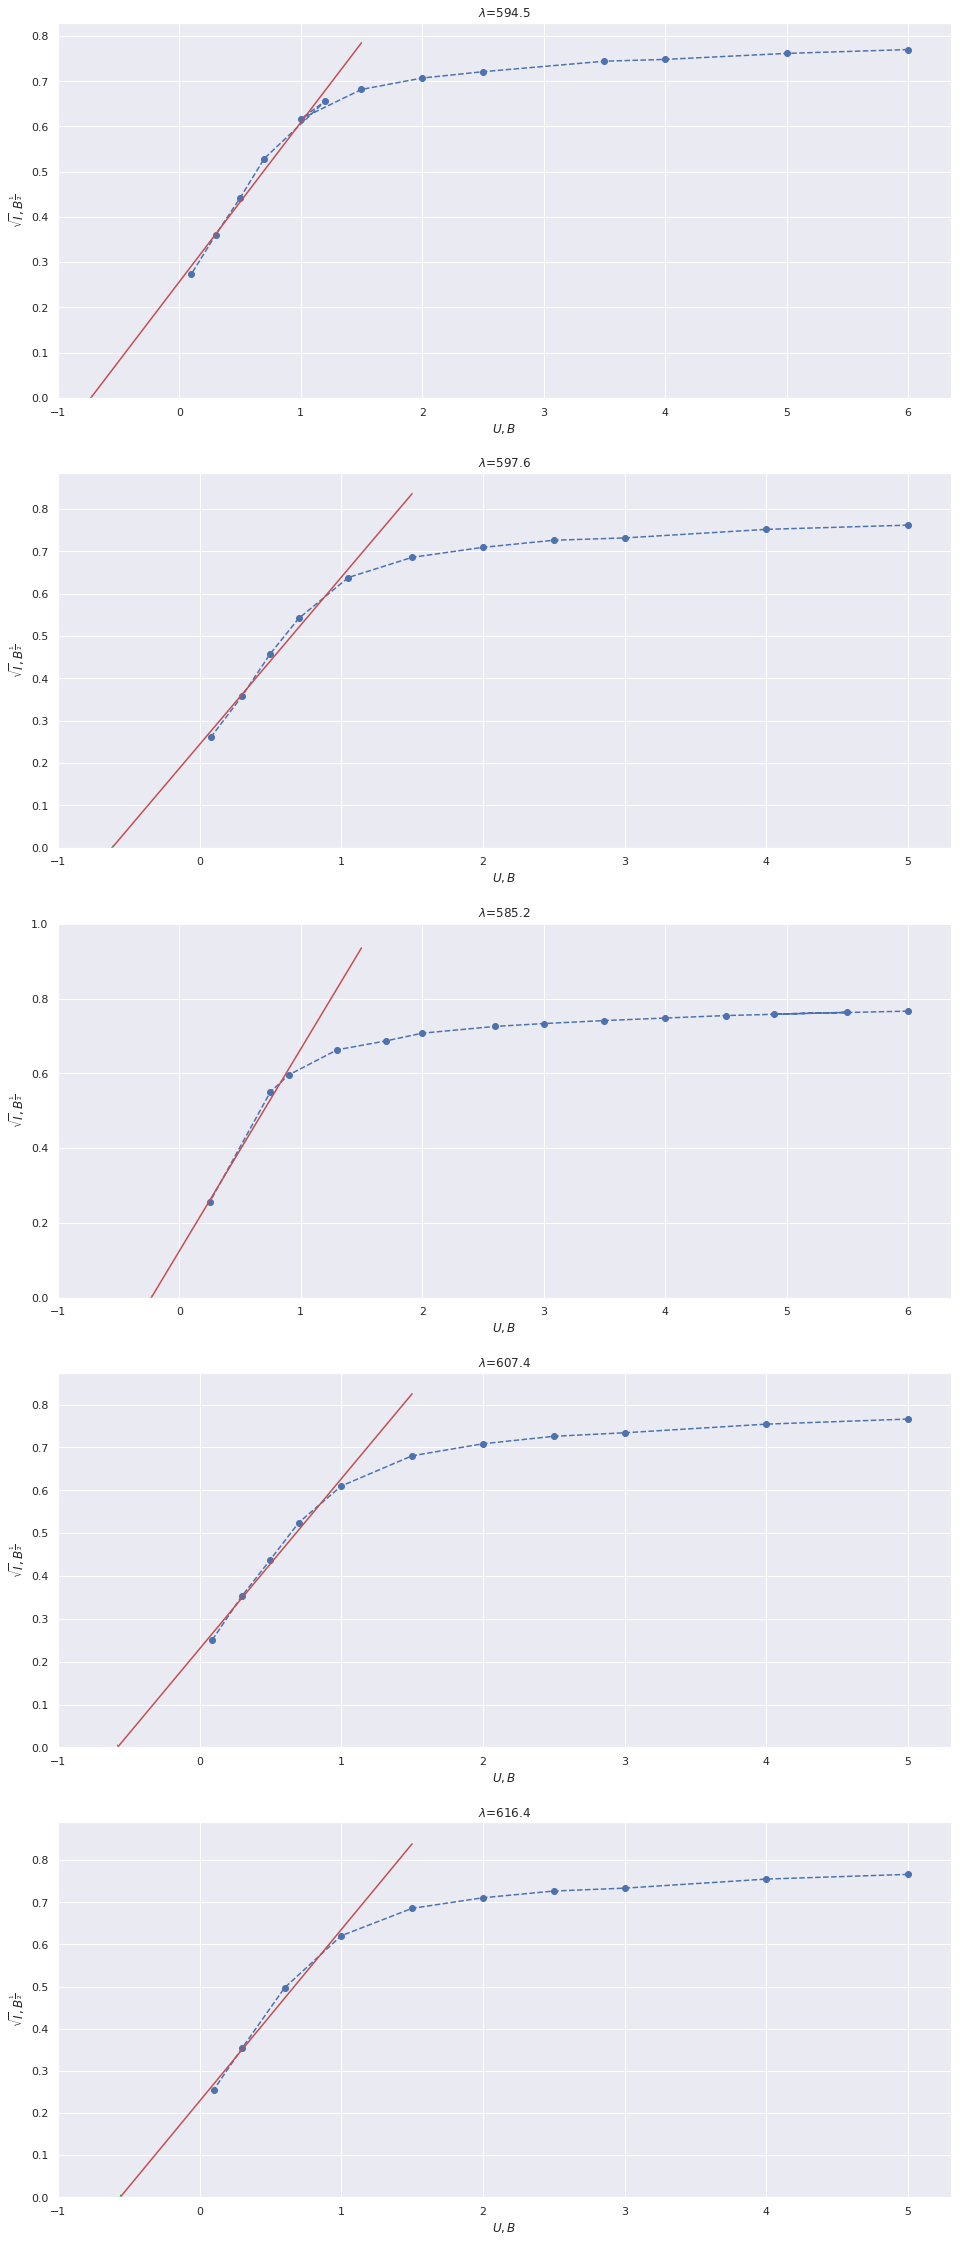

In [18]:
fig, axes = plt.subplots(5, figsize=(16, 40))
bounds = [6, 5, 3, 5, 4]
U0s = []
for i in range(5):
    U0s.append(get_U0(series[i], axes[i], bounds[i]))
U0s

In [46]:
plank_data = pd.DataFrame(U0s)
plank_data.columns = ["Line number", "$U_0$", "$\sigma_{U_0}$"]
plank_data["$\lambda, нм$"] = [lambdas[line] for line in plank_data["Line number"]]
plank_data = plank_data.sort_values(by = "Line number")
plank_data = plank_data[plank_data["Line number"]!=22]

Plank = 6.23e-34 +- 3e-34 Дж*с


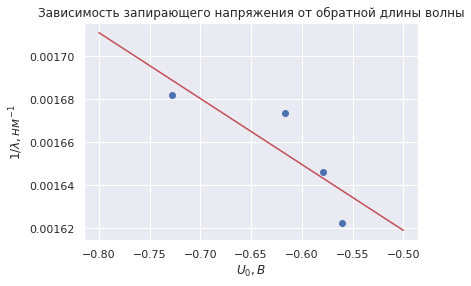

In [58]:
X, Y = plank_data["$U_0$"], 1/plank_data["$\lambda, нм$"]
plt.plot(X, Y, "bo")
plt.title("Зависимость запирающего напряжения от обратной длины волны")
plt.xlabel("$U_0, В$")
plt.ylabel("$1/\lambda, нм^{-1}$")
model = sm.OLS(Y, sm.add_constant(X))
res = model.fit()
params = res.params[::-1]
error = res.bse[::-1]
straight_line = np.poly1d(params)
inter = np.linspace(-.8, -.5, 100)
plt.plot(inter, straight_line(inter), "r")
coeff = params[0]
coeff_error =  error[0]
coeff, coeff_error
plank = abs(2.033e-30*(coeff))
plank_error = abs(2.033e-30*(coeff_error))
print("Plank = {:.3}".format(plank), "+-", "{:.1}".format(plank_error), "Дж*с")